# Text Mining

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()


import warnings
warnings.filterwarnings('ignore')

Text mining :

Text mining, also known as text analytics, is the process of extracting useful information and insights from large amounts of text data. It involves applying various techniques from natural language processing (NLP) and machine learning to analyze and understand textual content.

Text mining finds applications in various fields, including customer feedback analysis, social media sentiment analysis, document categorization, market research, fraud detection, and more. 

It helps organizations derive valuable knowledge from text data that can drive decision-making and provide deeper understanding of textual information.

Sentence segmentation: Identifying and separating individual sentences within a paragraph or document.

Stopwords, Lemmatization, Tokenization, Stemming, POS tagging: Techniques in text processing for removing common words, reducing words to their base form, breaking text into tokens, reducing words to their stems, and assigning part-of-speech tags to words, respectively.

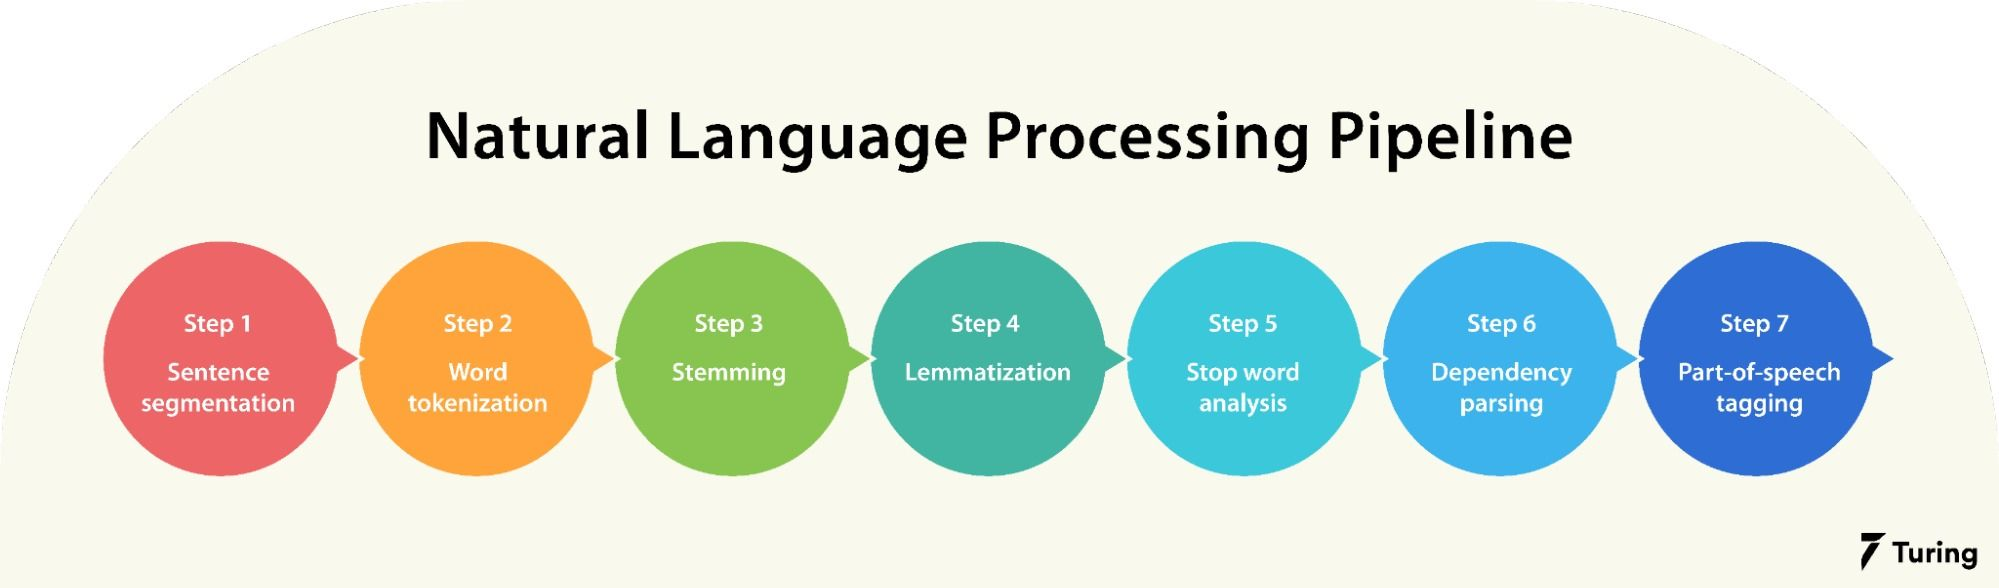

### Perform sentimental analysis on the Elon-musk tweets, obtained from twitter

### EDA

In [2]:
df=pd.read_csv('Elon_musk.csv',encoding ='latin-1')

In [3]:
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
len(df.index)

1999

In [5]:
df['tweets']=df['Text']

In [6]:
from collections import Counter
import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sakshideshmukh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Stop Words

In [7]:
top_N = 100  #Set the value for top_N

#The list is then extended to include the additional stopword 'rt', which is commonly found in retweets.
stopwords = nltk.corpus.stopwords.words('english')
stopwords = stopwords + ['rt']

#Define regular expression pattern for stopwords
#This line constructs a regular expression pattern RE_stopwords using the stopwords list.
#The pattern is formatted to match whole words using the \b word boundary, 
#and the join() function is used to join the stopwords using the | pipe character as a separator.

RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))

#Process the tweets data
#str.lower() converts the text to lowercase.
#replace() function replaces the '|' character and the stopwords using the RE_stopwords pattern. 
#It replaces them with a space (' ') and removes them from the text. 
#The regex=True argument enables regular expression matching.
#str.cat(sep=' ') concatenates all the processed tweet texts, separating them with a space.
#split() splits the resulting string into a list of individual words.

words = (df.tweets
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

#This code creates the words_data DataFrame using the Counter class from the collections module. 
#It counts the frequency of each word in the words list and selects the top 300 most common words. 
#These words are then used to construct the DataFrame with columns 'Word' and 'Frequency', 
#where 'Word' serves as the index.

words_data = pd.DataFrame(Counter(words).most_common(300),
                    columns=['Word','Frequency']).set_index('Word')

In [8]:
words_data

,Frequency
Word,
,243
&amp;,218
@erdayastronaut,140
@spacex,140
@ppathole,123
...,...
watch,7
<u+2192>,7
progress,7


### The SentimentIntensityAnalyzer is a pre-trained model that is part of  VADER (Valence Aware Dictionary and Sentiment Reasoner) sentiment analysis tool,is a lexicon and rule-based sentiment analysis tool

In [9]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sakshideshmukh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Visualizing the length of all tweets from the input data

Text(0, 0.5, 'Count')

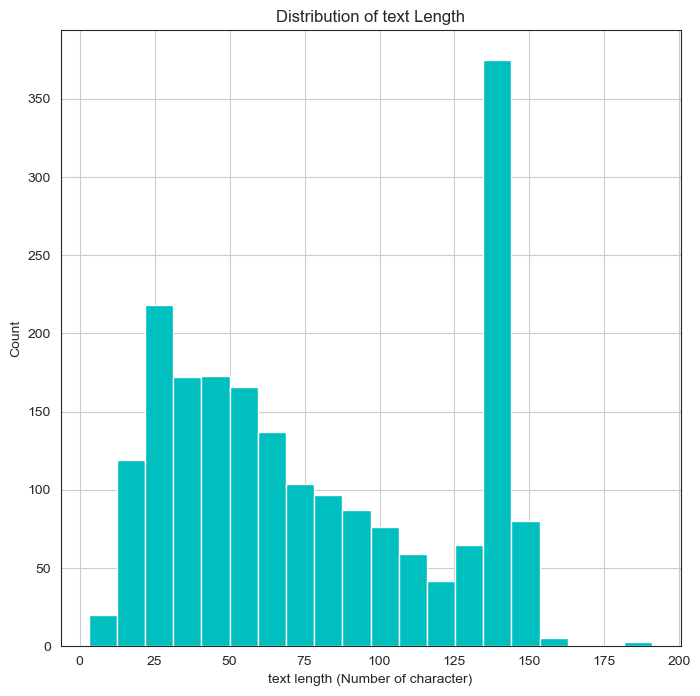

In [10]:
text_length = df["tweets"].dropna().map(lambda x: len(x))
plt.figure(figsize=(8,8))
text_length.loc[text_length < 1500].hist(color='c',bins=20)
plt.title("Distribution of text Length")
plt.xlabel('text length (Number of character)')
plt.ylabel('Count')

The histogram reveals a peak or a bin with the highest count, indicating the most common text length among the tweets.

## Cleaning the input tweets

Converting all the reviews into a Lowercase text

In [11]:
df["tweets"]= df["tweets"].apply(lambda x: " ".join(word.lower() for word in x.split()))

Removing punctuations from the review 

The code snippet you provided modifies the "Tweets" column of the DataFrame tweet by applying a lambda function. The lambda function iterates over each character (i) in the text (x) and checks if the character is not in the string.punctuation list

In [12]:
import string
df["tweets"]=df["tweets"].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

Removing Numbers from the tweets and replacing it with nothing

In [13]:
df["tweets"]=df["tweets"].str.replace('[0-9]','')

In [14]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sakshideshmukh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
stop_words=stopwords.words('english')

### Removing the stopwords from the tweets

In [16]:
df["tweets"]=df["tweets"].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [17]:
df.head()

,Unnamed: 0,Text,tweets
0,1,@kunalb11 Im an alien,kunalb im alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextleve...
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview
3,4,@gtera27 Doge is underestimated,gtera doge underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...


In [18]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sakshideshmukh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Lemmatize all the words in the tweet to its root word

In [19]:
import nltk
nltk.download('omw-1.4')
from textblob import Word

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sakshideshmukh/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [20]:
df["tweets"]= df["tweets"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [21]:
df.head()

,Unnamed: 0,Text,tweets
0,1,@kunalb11 Im an alien,kunalb im alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextleve...
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview
3,4,@gtera27 Doge is underestimated,gtera doge underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulation tesla china amazing exe...


As you can see, the lemmatization process has not made any noticeable changes to the text in the "Tweets" column. This could be because the words in the original text were already in their base or dictionary form, or the lemmatization process did not result in any significant changes to the words.

### Replace all special characters and symbols

In [22]:
import re

#This line defines a regular expression pattern using a raw string literal (r"..."). 
#n simpler terms, the pattern captures a single character that is surrounded by either the start of a line or a space on the left side, 
#and surrounded by either the end of a line or a space on the right side. Essentially, 
#it captures any character that has a space character before and after it (including the space characters themselves).
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"

#((?<=^)|(?<= )): This part of the pattern is a positive lookbehind that matches either 
#the start of a line ((?<=^)) or a space character ((?<= )).

# .: This matches any single character.

#((?=$)|(?= )): This part of the pattern is a positive lookahead that matches 
#either the end of a line ((?=$)) or a space character ((?= )).

df["tweets"]= df["tweets"].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [23]:
Tweets_set=df["tweets"]
Tweets_set

0                                        kunalb im alien
1       idaacarmack ray tracing cyberpunk hdr nextleve...
2                        joerogan spotify great interview
3                               gtera doge underestimated
4       teslacn congratulation tesla china amazing exe...
                              ...                        
1994    flcnhvy true sound surreal negative propaganda...
1995    ppathole make sure read ur term amp condition ...
1996                    teslagong ppathole samwise gamgee
1997                      ppathole altho dumb dumber ufuf
1998                               progress update august
Name: tweets, Length: 1999, dtype: object

### A user defined function to remove all teh empoji's from the tweets

In [24]:
import re

def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df["tweets"] = df["tweets"].apply(remove_emojis)

#### Importing countvectorizer to create a bag of words model

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

CountVectorizer to convert the text data in the "tweets" column into a numerical matrix representing the occurrence of words. It then converts this matrix into a DataFrame, providing a tabular representation of the bag of words model.

In [26]:
vec = CountVectorizer()
x = vec.fit_transform(df["tweets"])
df_1 = pd.DataFrame(x.toarray(),columns=vec.get_feature_names_out())
print (df_1)

      aber  able  abo  aboard  abort  absence  absolute  absolutely  absorb  \
0        0     0    0       0      0        0         0           0       0   
1        0     0    0       0      0        0         0           0       0   
2        0     0    0       0      0        0         0           0       0   
3        0     0    0       0      0        0         0           0       0   
4        0     0    0       0      0        0         0           0       0   
...    ...   ...  ...     ...    ...      ...       ...         ...     ...   
1994     0     0    0       0      0        0         0           0       0   
1995     0     0    0       0      0        0         0           0       0   
1996     0     0    0       0      0        0         0           0       0   
1997     0     0    0       0      0        0         0           0       0   
1998     0     0    0       0      0        0         0           0       0   

      absorption  ...  zikryzamir  zip  zogfotpik  

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

TfidfVectorizer from scikit-learn library to create a TF-IDF (Term Frequency-Inverse Document Frequency) representation of the "Tweets" data.

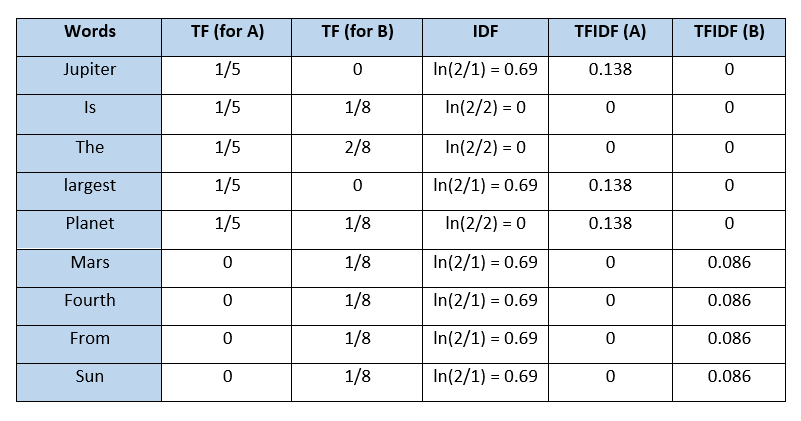

In [28]:
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(df["tweets"])
print(TFIDF)

  (0, 112)	0.6623688405640785
  (0, 2668)	0.7491778954626188
  (1, 4516)	0.3503086432516702
  (1, 3131)	0.39490911009737484
  (1, 1636)	0.4162521748644735
  (1, 878)	0.35842289988597426
  (1, 4493)	0.4162521748644735
  (1, 3597)	0.4162521748644735
  (1, 2403)	0.2703073340188711
  (2, 2519)	0.5043290017718325
  (2, 1567)	0.3080284702583498
  (2, 4107)	0.5704255952716918
  (2, 2590)	0.5704255952716918
  (3, 4619)	0.6108339384056402
  (3, 1037)	0.5037497388423235
  (3, 1586)	0.6108339384056402
  (4, 1231)	0.2876711653018475
  (4, 3130)	0.27277696499630993
  (4, 4900)	0.24937628204523501
  (4, 2689)	0.32114907525749786
  (4, 1259)	0.4094092137495757
  (4, 140)	0.3260835812455286
  (4, 642)	0.3525306208428504
  (4, 4334)	0.1828625922881543
  (4, 764)	0.3260835812455286
  :	:
  (1994, 146)	0.1467268755427102
  (1994, 4524)	0.2232488943707964
  (1994, 1382)	0.17157171851514066
  (1995, 21)	0.4008409077440879
  (1995, 678)	0.4008409077440879
  (1995, 4329)	0.36570555829866774
  (1995, 753)	0.3

### Visualizing the Twitter data with word cloud, to see the highly commnly used words in the tweets

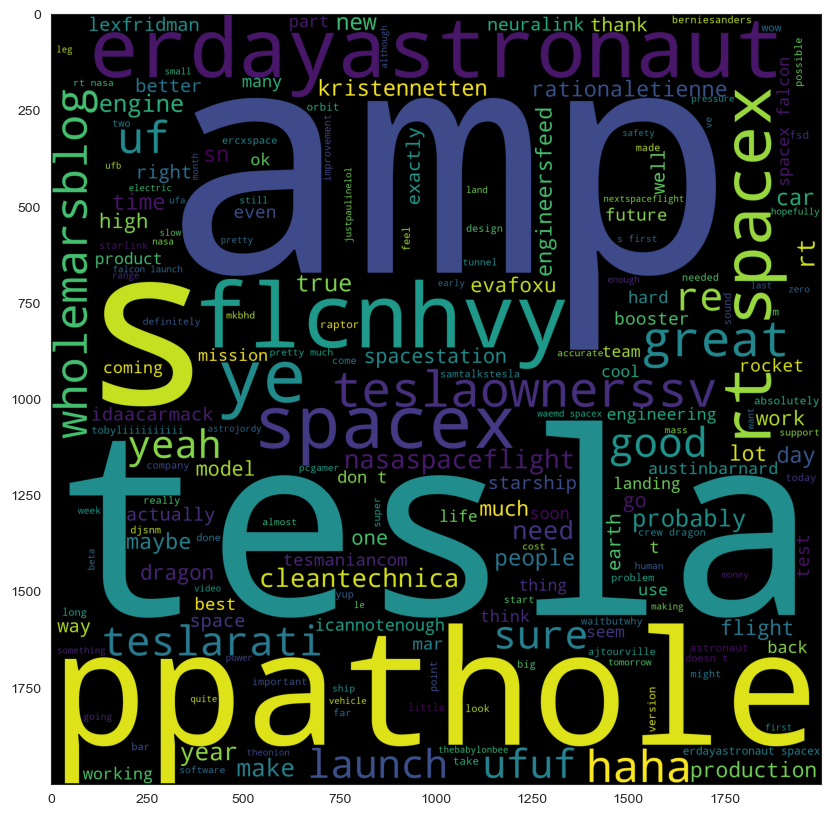

In [29]:
Review_wordcloud = ' '.join(df["tweets"])
Q_wordcloud=WordCloud(
                    background_color='black',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

### Printing the frequency of the first 20 words in the whole Elon musk tweet

In [30]:
freq = pd.Series(' '.join(df["tweets"]).split()).value_counts()[0:20]
freq

spacex             239
amp                218
tesla              169
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
launch              56
its                56
haha                55
nasaspaceflight     55
uf                  53
good                52
year                48
sure                43
dtype: int64

In [31]:
import collections
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sakshideshmukh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

punkt is a module in the NLTK (Natural Language Toolkit) library that provides a pre-trained model for tokenization. Tokenization is the process of splitting text into individual tokens, such as words or sentences.

## Calculating the polarity score of the tweets

In sentiment analysis, the polarity score is a measure that indicates the sentiment or emotional tone of a given text or document. It quantifies whether the text expresses positive, negative, or neutral sentiment.

The polarity score is typically represented on a numerical scale, often ranging from -1 to 1. A score of -1 indicates extremely negative sentiment, a score of 1 indicates extremely positive sentiment, and a score of 0 represents a neutral sentiment. Intermediate values between -1 and 1 indicate varying degrees of negativity or positivity.

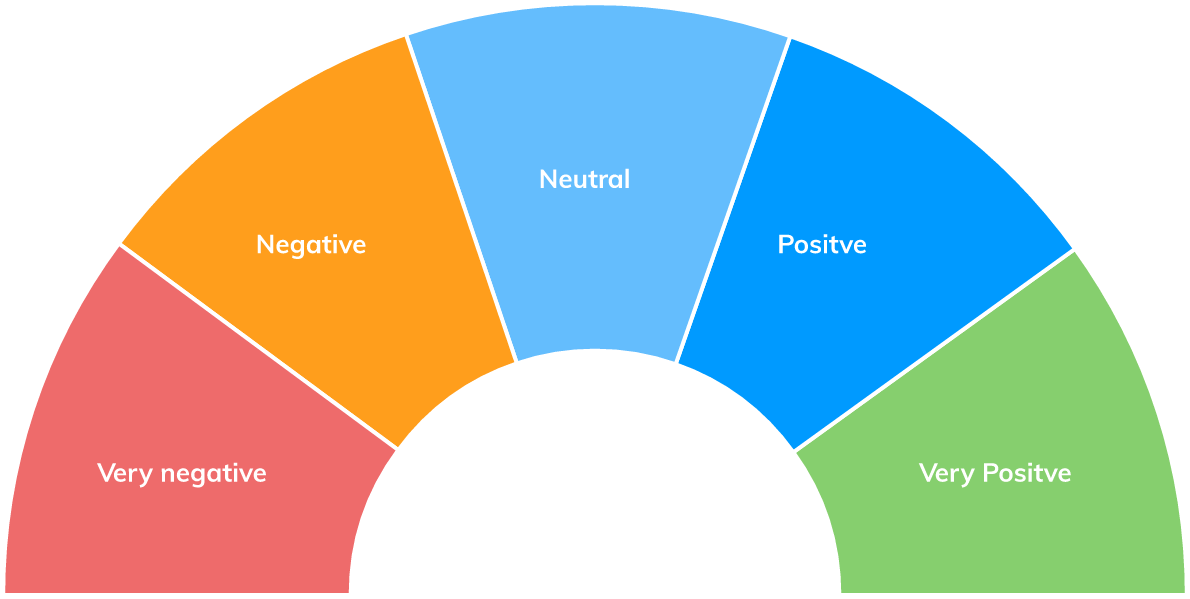

The sentiment property returns a tuple containing two values: the polarity and subjectivity scores.

The polarity score indicates the sentiment polarity, ranging from -1.0 (negative sentiment) to 1.0 (positive sentiment).
The subjectivity score represents the subjectivity of the text, ranging from 0.0 (objective) to 1.0 (subjective).

By accessing sentiment[0], we extract the polarity score from the sentiment tuple. It allows us to retrieve just the polarity score without the subjectivity score.

In [32]:
from textblob import TextBlob

In [33]:
df['polarity']=df["tweets"].apply(lambda x: TextBlob(x).sentiment[0])
df[['tweets','polarity']].head(5)

,tweets,polarity
0,kunalb im alien,-0.25
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.00
2,joerogan spotify great interview,0.80
3,gtera doge underestimated,0.00
4,teslacn congratulation tesla china amazing exe...,0.20


### Top 5 positive posts of Category

In [40]:
df[df.polarity>0].head(5)

,Unnamed: 0,tweets,polarity
2,3,joerogan spotify great interview,0.800000
4,5,teslacn congratulation tesla china amazing exe...,0.200000
5,6,happy new year ox httpstcowfkmyuoj,0.468182
7,8,owensparks flcnhvy anonyx haha thanks,0.200000
9,10,entertaining outcome likely,0.250000


### Creating a user defined function to identify if the tweets are positive, negative or neutral

In [48]:
def sent_type(tweets):
    for i in (tweets):
        if i>0:
            print('positive')
        elif i==0:
            print('netural')
        else :
            print ('negative')

In [53]:
sent_type(df['polarity'])

negative
netural
positive
netural
positive
positive
negative
positive
netural
positive
netural
netural
netural
positive
netural
positive
positive
netural
netural
positive
netural
netural
positive
netural
positive
negative
negative
netural
netural
netural
netural
netural
negative
netural
positive
positive
positive
netural
netural
netural
netural
positive
positive
netural
netural
netural
positive
netural
netural
netural
positive
netural
positive
netural
netural
netural
netural
positive
netural
netural
netural
netural
netural
netural
positive
positive
netural
netural
positive
netural
netural
netural
positive
positive
positive
netural
netural
netural
netural
positive
positive
netural
netural
netural
netural
netural
netural
negative
netural
netural
positive
netural
netural
positive
positive
netural
netural
positive
negative
netural
netural
positive
netural
netural
positive
negative
positive
positive
positive
netural
netural
netural
positive
netural
netural
positive
positive
positive
netural

### Assigns the values from the "polarity" column 

In [58]:
df["category"]=df['polarity']

df.loc[df.category>0,'category']="positive"
df.loc[df.category !='positive','category']="negative"

# It changes the data type of the "category" column to a categorical data type.
df["category"]=df["category"].astype('category')
df.dtypes

Unnamed: 0       int64
tweets          object
polarity       float64
category      category
dtype: object

### Visualising the positive and the negative words in the Elon musk tweet on the whole

<AxesSubplot:xlabel='category', ylabel='count'>

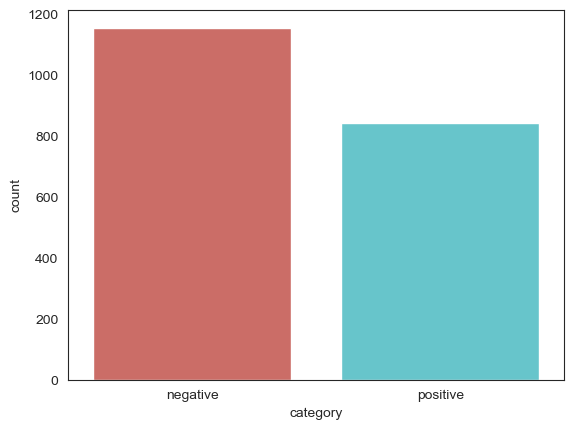

In [59]:
sns.countplot(x='category',data=df,palette='hls')

In [63]:
#normalize(True): This method normalizes the counts by dividing each count by the total count of all values 
#in the "category" column. This converts the counts into relative frequencies or proportions.

#mul(100): This operation multiplies each normalized value by 100, effectively converting the proportions 
#into percentages.


df.category.value_counts(normalize=True).mul(100)

negative    57.778889
positive    42.221111
Name: category, dtype: float64

## Visualising the positive and negative words used in the tweets, using Word cloud

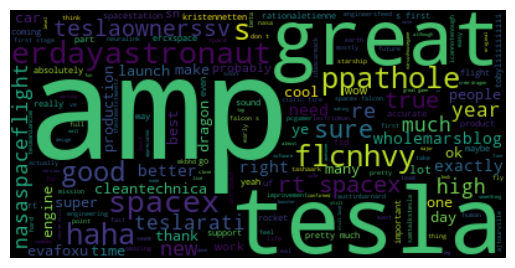

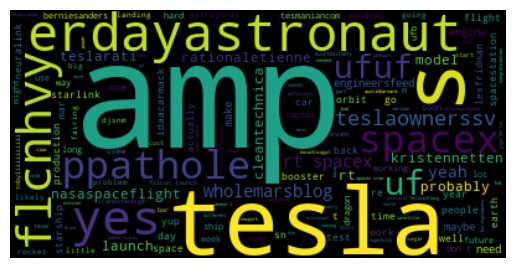

In [65]:
positive_reviews= df[df.category=='positive']
negative_reviews= df[df.category=='negative']
positive_reviews_text=" ".join(positive_reviews.tweets.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.tweets.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()

## Inference :

### From the model and the word cloud, taht we have created, it is clear that, in the tweets, the most frequent word used includes amp,great,tesla,spacex etc.
### From the probabilties predicted by sentiment analysis, these tweets have 58% negative words and 42% positive words

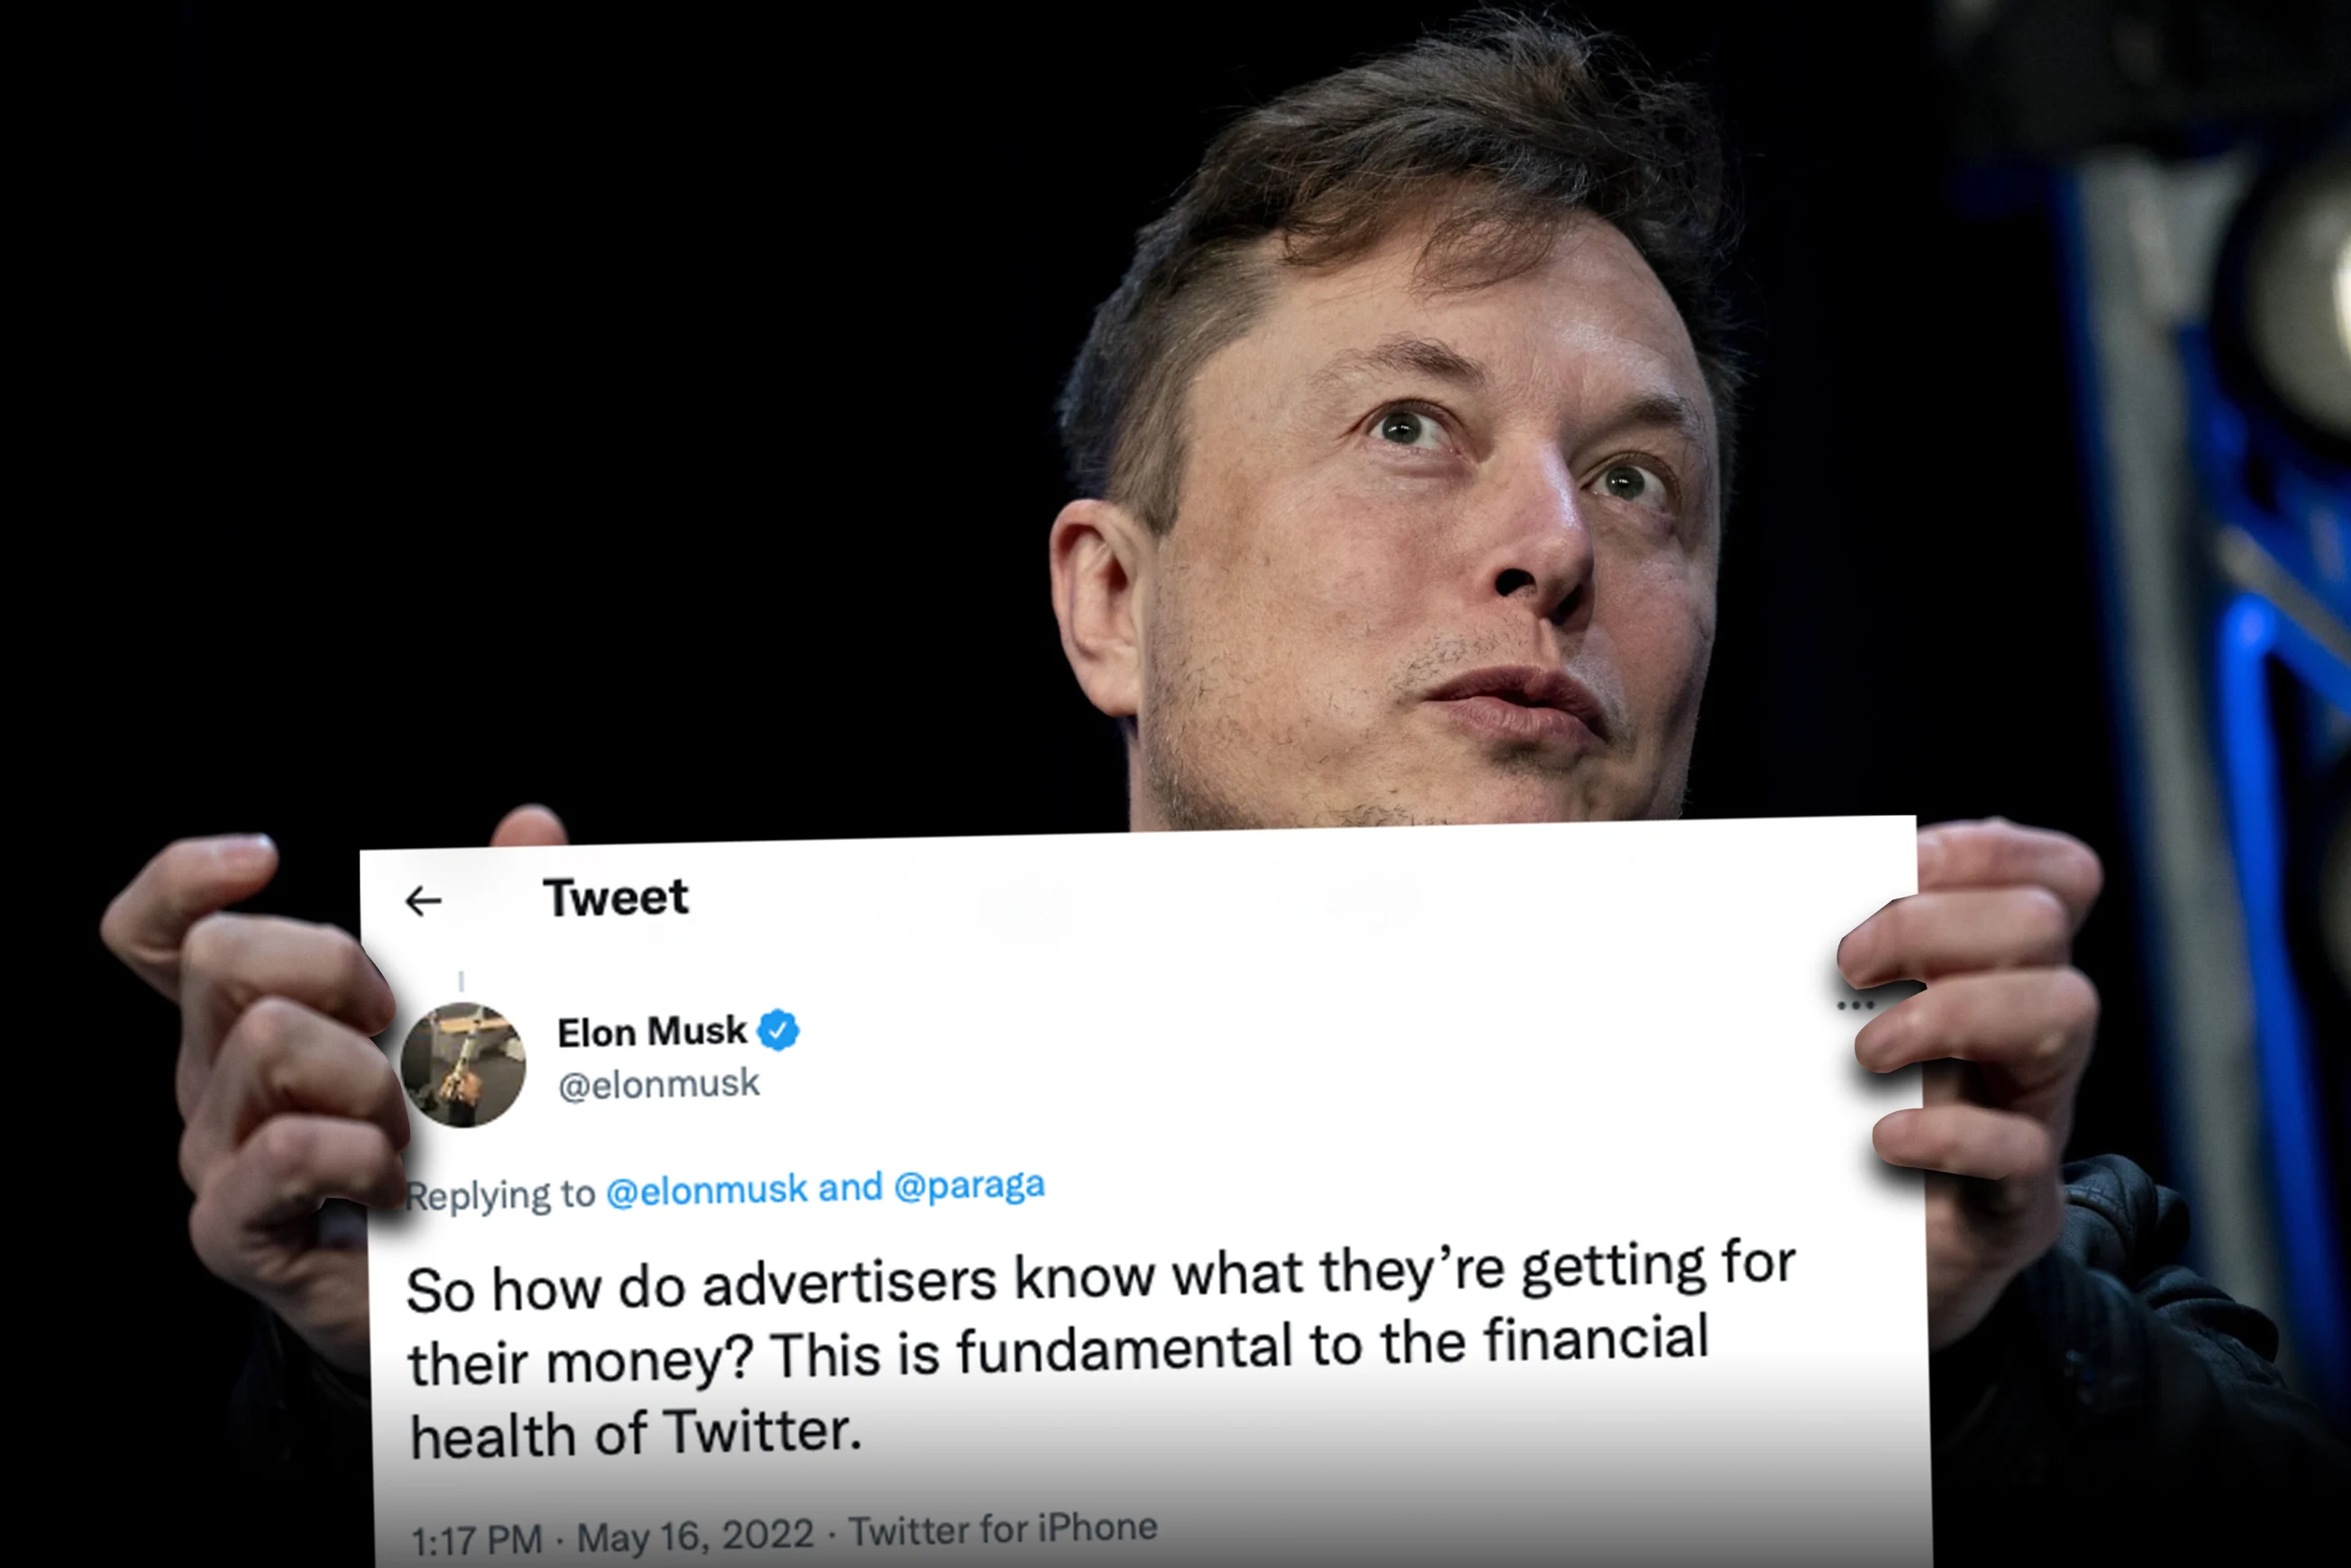